# Investigate UK Policing Open Data 

Install 3rd party libraries

In [ ]:
!pip install pathlib scipy pandas seaborn

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First we define a function to read the data into memory. 

This function uses pattern matching to itterate through all CSV's in a directory. It then builds a Python dictionary {key: value}.
* Each key is the filename of the data which has been imported
* Each value is the dataset itself stored as a Pandas DataFrame.

In [9]:
def read_csvs_from_path(path):
    """Read csv's from a directory 
    """
    data_dict = {}
    for file in path.glob("*.csv"):
        print("Loading", file.as_posix())
        try:
            data = pd.read_csv(file.as_posix(), encoding='utf-8')
            data_dict[file.name] = data
        except:
            print('Unable to load', file.as_posix())
    return data_dict

Call the function defined above and read the data into memory.

{"name": dataset}

In [10]:
data_path = Path.cwd()/"data/police/"
data_dictionary = read_csvs_from_path(path=data_path)

Loading /home/jovyan/data/police/victim-satisfaction-september-2014.csv
Loading /home/jovyan/data/police/victim-satisfaction-supplementary-data-september-2011-12-13-14.csv
Loading /home/jovyan/data/police/crime-data-2014.csv
Loading /home/jovyan/data/police/domestic-abuse-force-data.csv
Loading /home/jovyan/data/police/anti-social-behaviour-ipsos-mori-survey-results-by-force-20101107.csv
Unable to load /home/jovyan/data/police/anti-social-behaviour-ipsos-mori-survey-results-by-force-20101107.csv
Loading /home/jovyan/data/police/Principal_Offence_Category_Jul.csv
Loading /home/jovyan/data/police/police-corruption-and-integrity-data-2014.csv


Drop NaN/Na rows for all datasets. Not best practice in all cases, but it makes analysis simpler

In [12]:
for key in data_dictionary.keys():
    data_dictionary[key] = data_dictionary[key].dropna()

## Victim Satisfaction September 2014

Sense check the first 5 lines of the dataset.

In [23]:
vs = data_dictionary["victim-satisfaction-september-2014.csv"]

In [41]:
satisfaction_columns = []
confidence_columns = []
for i, column in enumerate(vs.columns[1:]):
    if i%2==0:
        confidence_interval_columns.append(column)
    else:
        satisfaction_columns.append(column)

In [54]:
satisfaction_columns_new = ["victim satisfaction " + column[-4:] for column in satisfaction_columns]
confidence_columns_new = ["confidence interval " + column[-4:] for column in confidence_columns]

In [57]:
satisfaction_columns_new

['victim satisfaction 2014',
 'victim satisfaction 2013',
 'victim satisfaction 2012',
 'victim satisfaction 2011']

In [61]:
columns = dict(
    **dict(zip(satisfaction_columns, satisfaction_columns_new)),
    **dict(zip(confidence_columns, confidence_columns_new)),
    **dict(zip(['Unnamed: 0'], ['Force']))
)
columns

{'Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2014': 'victim satisfaction 2014',
 'Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2013': 'victim satisfaction 2013',
 'Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2012': 'victim satisfaction 2012',
 'Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2011': 'victim satisfaction 2011',
 'Unnamed: 0': 'Force'}

In [63]:
vs.rename(columns=columns, inplace=True)

In [64]:
vs.head()

,Force,Percentage of respondents satisfied with overall service in 12 months to September 2014,victim satisfaction 2014,Percentage of respondents satisfied with overall service in 12 months to September 2013,victim satisfaction 2013,Percentage of respondents satisfied with overall service in 12 months to September 2012,victim satisfaction 2012,Percentage of respondents satisfied with overall service in 12 months to September 2011,victim satisfaction 2011
1,England and Wales,84.659592,0.193317,85.192902,0.193038,84.017067,0.199411,83.907410,0.192521
2,Avon and Somerset,86.902000,1.204244,88.474068,1.126108,86.026253,1.151572,88.189224,1.001748
3,Bedfordshire,82.988960,0.141522,82.725594,0.151133,80.620575,1.432649,79.987061,1.495883
4,Cambridgeshire,88.022606,1.292982,88.388687,1.245047,85.089828,1.466929,86.208206,1.368555
5,Cheshire,85.710861,2.270781,88.447685,1.683268,85.974068,1.902107,86.958946,1.683892


In [15]:
vs.dtypes

Unnamed: 0                                                                                                     object
Percentage of respondents satisfied with overall service in 12 months to September 2014                        object
Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2014    object
Percentage of respondents satisfied with overall service in 12 months to September 2013                        object
Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2013    object
Percentage of respondents satisfied with overall service in 12 months to September 2012                        object
Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2012    object
Percentage of respondents satisfied with overall service in 12 months to September 2011                        object
Confidence Interval percentage of respondents satisfied 

In [16]:
float_columns = vs.columns[1:]
object_columns = vs.columns[0]

In [17]:
vs.dtypes

Unnamed: 0                                                                                                     object
Percentage of respondents satisfied with overall service in 12 months to September 2014                        object
Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2014    object
Percentage of respondents satisfied with overall service in 12 months to September 2013                        object
Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2013    object
Percentage of respondents satisfied with overall service in 12 months to September 2012                        object
Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2012    object
Percentage of respondents satisfied with overall service in 12 months to September 2011                        object
Confidence Interval percentage of respondents satisfied 

In [18]:
for column in float_columns:
    vs[column] = vs[column].astype('float32')

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Percentage of respondents satisfied with overall service in 12 months to September 2014'>

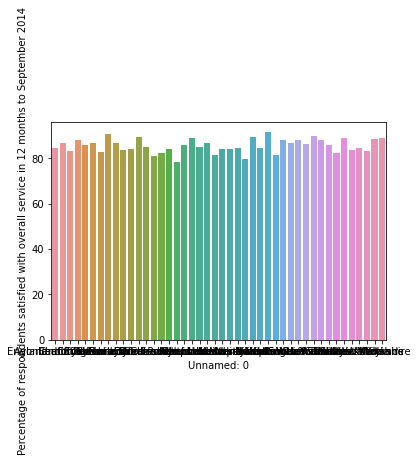

In [19]:
vs = data_dictionary["victim-satisfaction-september-2014.csv"]
sns.barplot(x='Unnamed: 0', y='Percentage of respondents satisfied with overall service in 12 months to September 2014', data=vs)

In [20]:
for key in data_dictionary.keys():
    data_dictionary[key] = data_dictionary[key].dropna()

In [21]:
print(list(data_dictionary.keys())[0])
victim satisfaction = data_dictionary[list(data_dictionary.keys())[0]].head()

SyntaxError: invalid syntax (<ipython-input-21-d5d4b35e3724>, line 2)

In [22]:
sns.plot(dat_dictionary)

AttributeError: module 'seaborn' has no attribute 'plot'